<a href="https://colab.research.google.com/github/vignesh4836/edatheoda1/blob/main/edatheoda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("https://raw.githubusercontent.com/salemprakash/EDA/main/Data/USSeatBelts.csv")

In [3]:
df.shape

(765, 13)

In [4]:
df.head()

,rownames,state,year,miles,fatalities,seatbelt,speed65,speed70,drinkage,alcohol,income,age,enforce
0,1,AK,1983,3358,0.044669,NaN,no,no,yes,no,17973,28.234966,no
1,2,AK,1984,3589,0.037336,NaN,no,no,yes,no,18093,28.343542,no
2,3,AK,1985,3840,0.033073,NaN,no,no,yes,no,18925,28.372816,no
3,4,AK,1986,4008,0.025200,NaN,no,no,yes,no,18466,28.396652,no
4,5,AK,1987,3900,0.019487,NaN,no,no,yes,no,18021,28.453251,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 765 entries, 0 to 764
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   rownames    765 non-null    int64  
 1   state       765 non-null    object 
 2   year        765 non-null    int64  
 3   miles       765 non-null    int64  
 4   fatalities  765 non-null    float64
 5   seatbelt    556 non-null    float64
 6   speed65     765 non-null    object 
 7   speed70     765 non-null    object 
 8   drinkage    765 non-null    object 
 9   alcohol     765 non-null    object 
 10  income      765 non-null    int64  
 11  age         765 non-null    float64
 12  enforce     765 non-null    object 
dtypes: float64(3), int64(4), object(6)
memory usage: 77.8+ KB


In [ ]:
!git clone https://github.com/vignesh4836/edatheoda1.git

Cloning into 'edatheoda1'...


In [6]:
df.describe()

,rownames,year,miles,fatalities,seatbelt,income,age
count,765.000000,765.00000,765.000000,765.000000,556.000000,765.000000,765.000000
mean,383.000000,1990.00000,41447.734641,0.021490,0.528852,17992.586928,35.137194
std,220.980768,4.32332,43961.990037,0.006171,0.170186,4811.459296,1.698131
min,1.000000,1983.00000,3099.000000,0.008327,0.060000,8372.000000,28.234966
25%,192.000000,1986.00000,11401.000000,0.017341,0.420000,14266.000000,34.387501
50%,383.000000,1990.00000,30319.000000,0.021199,0.550000,17624.000000,35.391766
75%,574.000000,1994.00000,52312.000000,0.024774,0.650000,21080.000000,36.130787
max,765.000000,1997.00000,285612.000000,0.045470,0.870000,35863.000000,39.169582


In [7]:
df.isnull().sum()

,0
rownames,0
state,0
year,0
miles,0
fatalities,0
seatbelt,209
speed65,0
speed70,0
drinkage,0
alcohol,0


In [11]:
mean_value = df['seatbelt'].mean()
df['seatbelt'].fillna(mean_value, inplace=True)


In [12]:
df.isnull().sum()

,0
rownames,0
state,0
year,0
miles,0
fatalities,0
seatbelt,0
speed65,0
speed70,0
drinkage,0
alcohol,0


In [13]:
df.duplicated().sum()


0

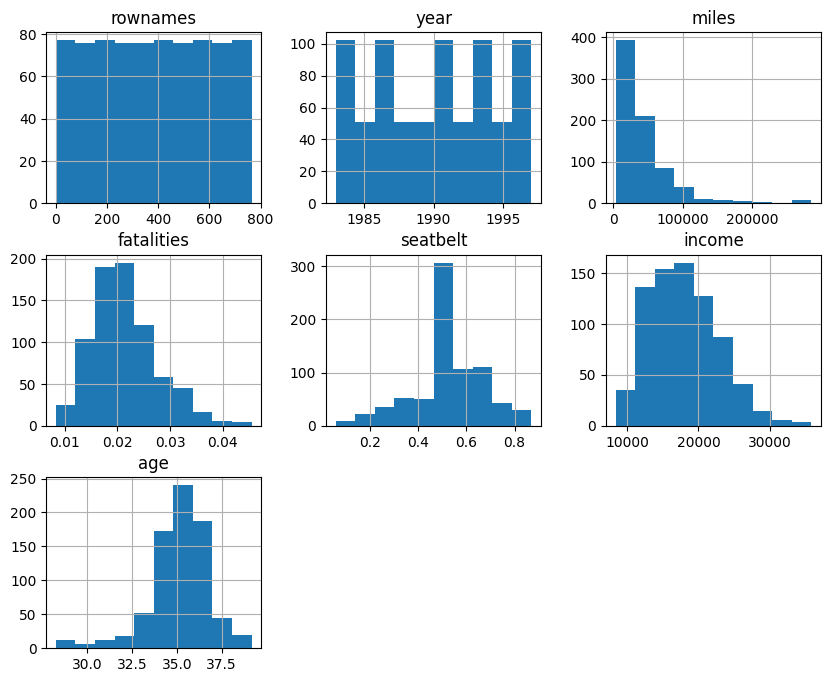

In [14]:
df.hist(figsize=(10, 8))
plt.show()

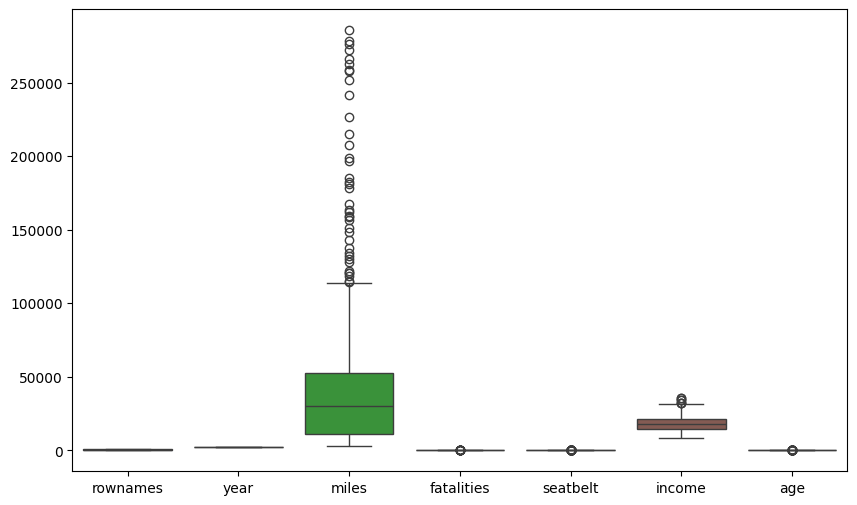

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.show()

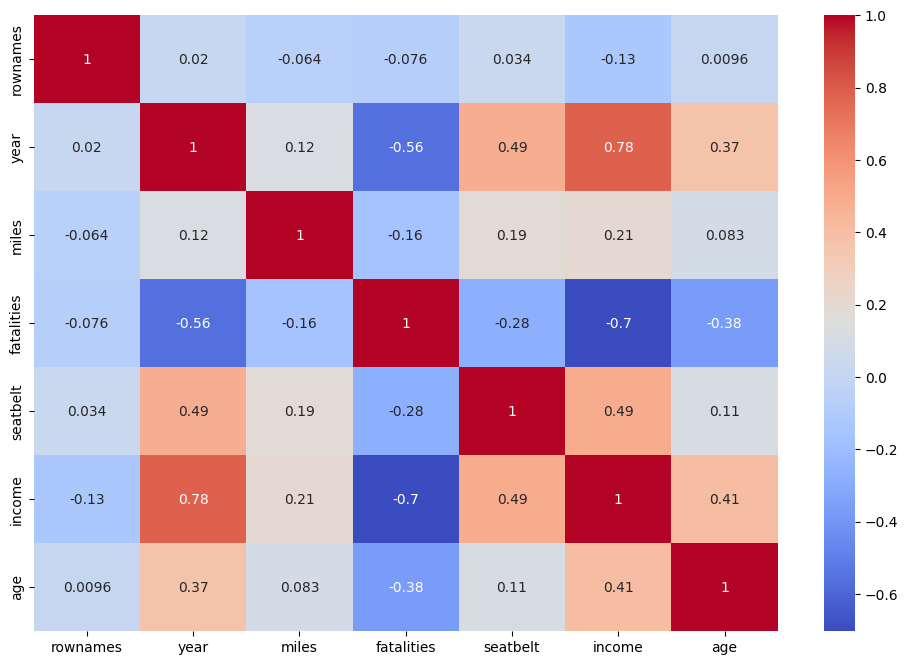

In [18]:
plt.figure(figsize=(12, 8))

numeric_df = df.select_dtypes(include=[np.number])

sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()


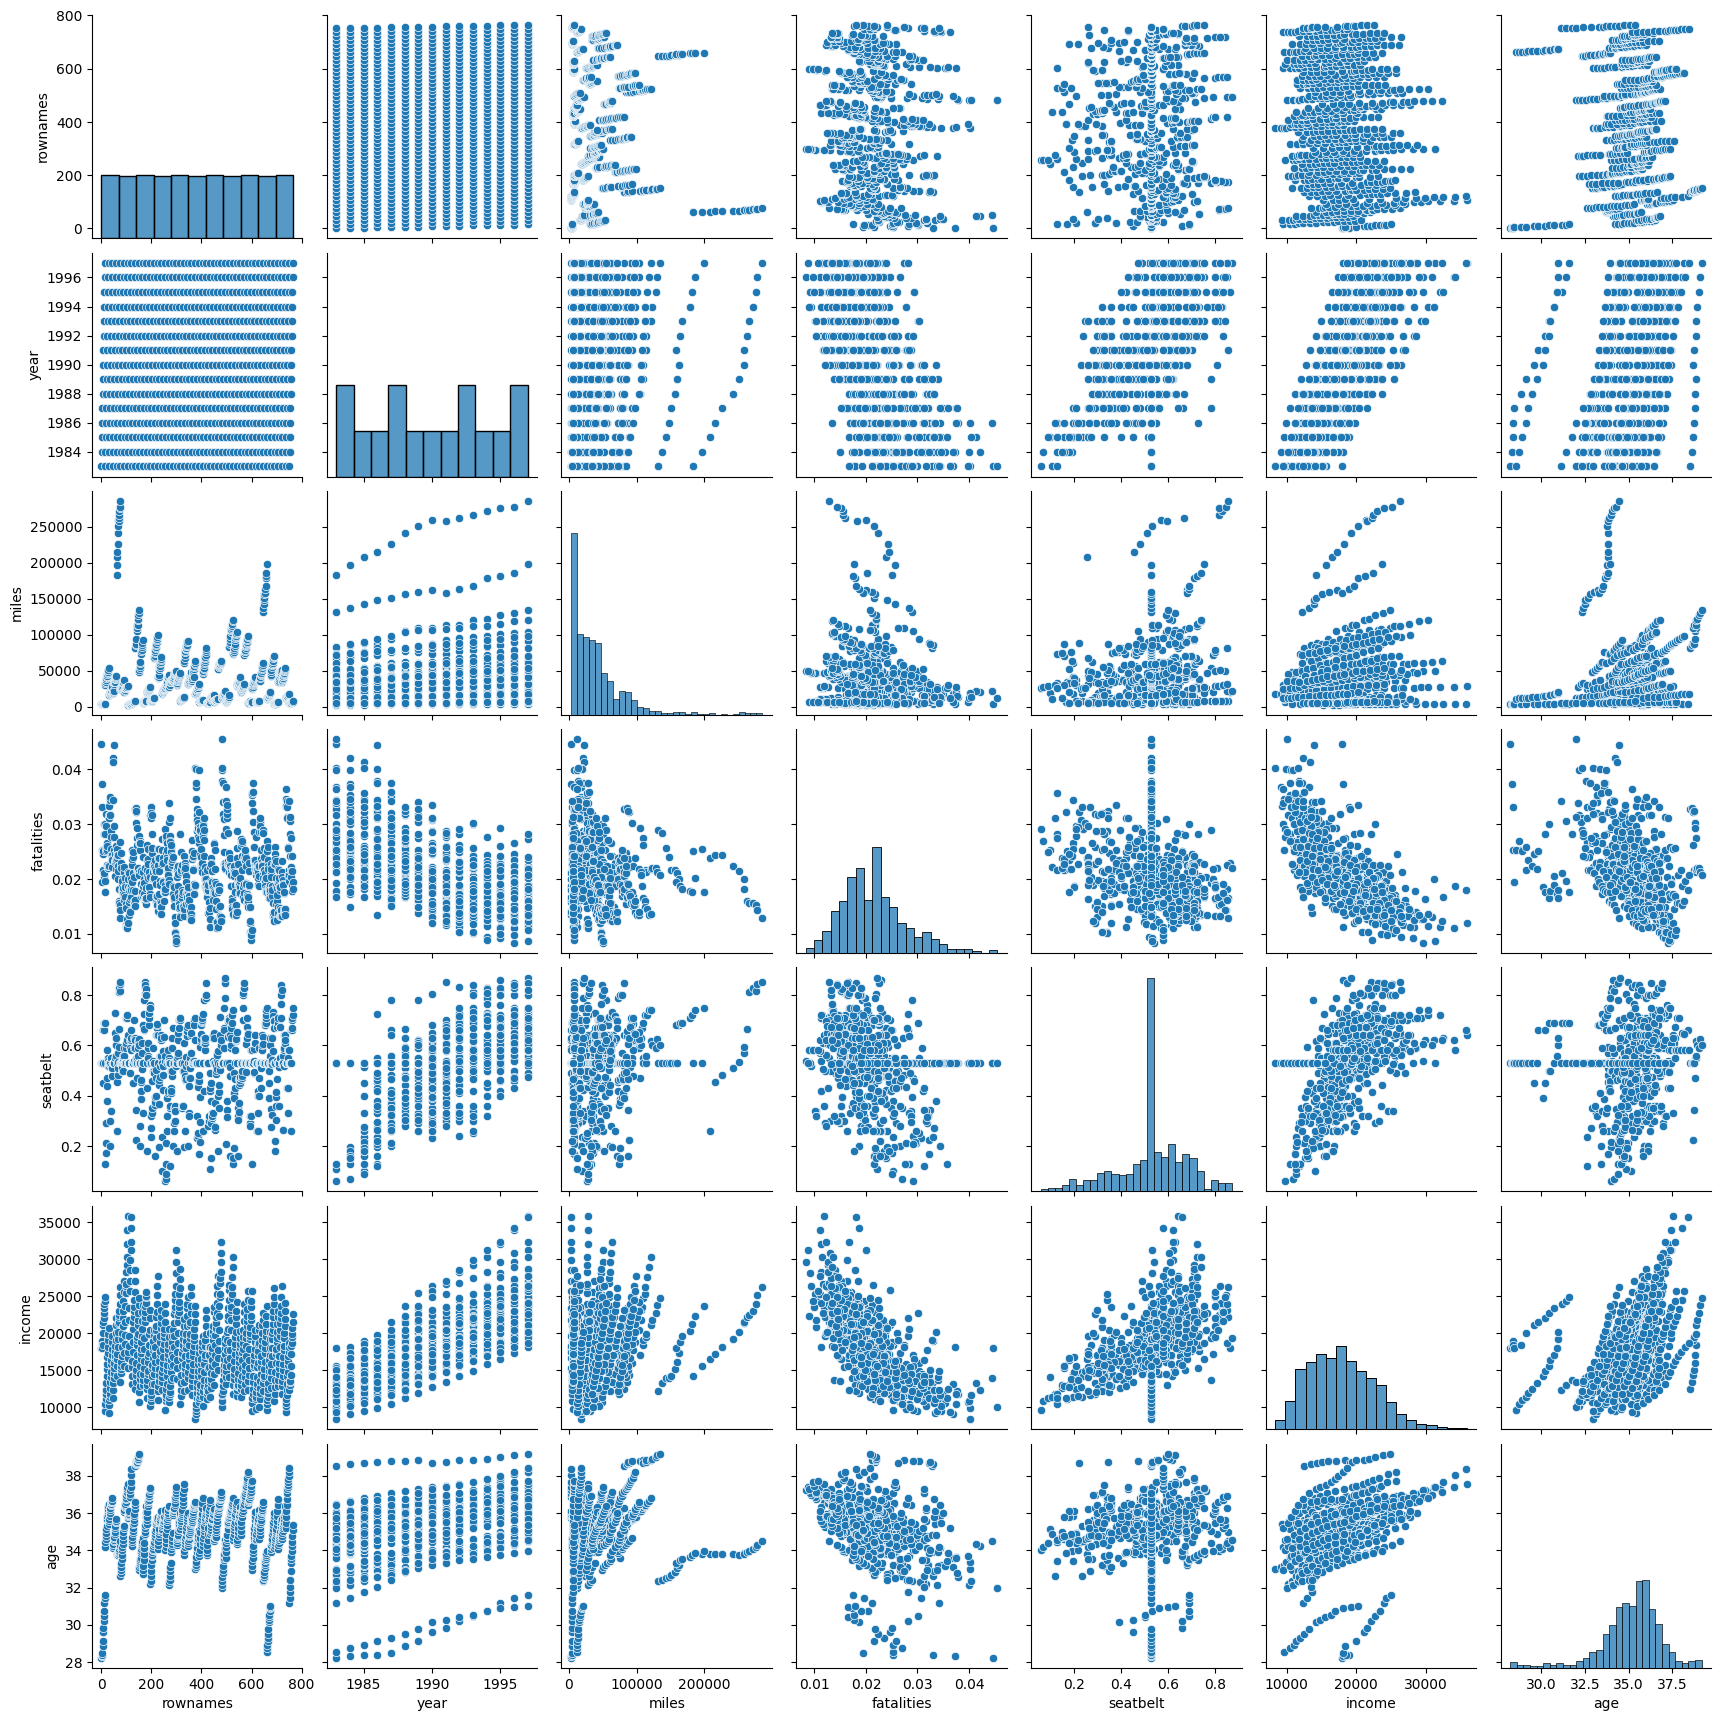

In [19]:
sns.pairplot(df)
plt.show()


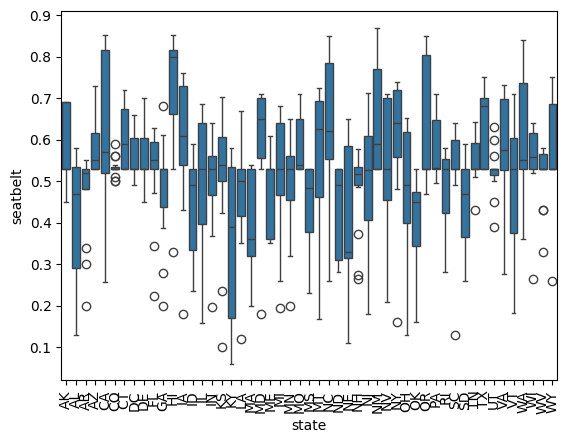

In [23]:
sns.boxplot(x='state', y='seatbelt', data=df)
plt.xticks(rotation=90)
plt.show()


In [31]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df.select_dtypes(include=[np.number]))
pca_result

array([[-38080.13957465,    851.67515924],
       [-37846.46186563,    966.36609977],
       [-37576.54286224,   1792.40456423],
       ...,
       [-34333.46155915,   3474.6905612 ],
       [-33998.39975522,   4306.2438684 ],
       [-33757.99528688,   5373.01496534]])

In [33]:
# Discretize

from sklearn.preprocessing import KBinsDiscretizer
if 'income' in df.columns:
    est = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
    df['income_binned'] = est.fit_transform(df[['income']])


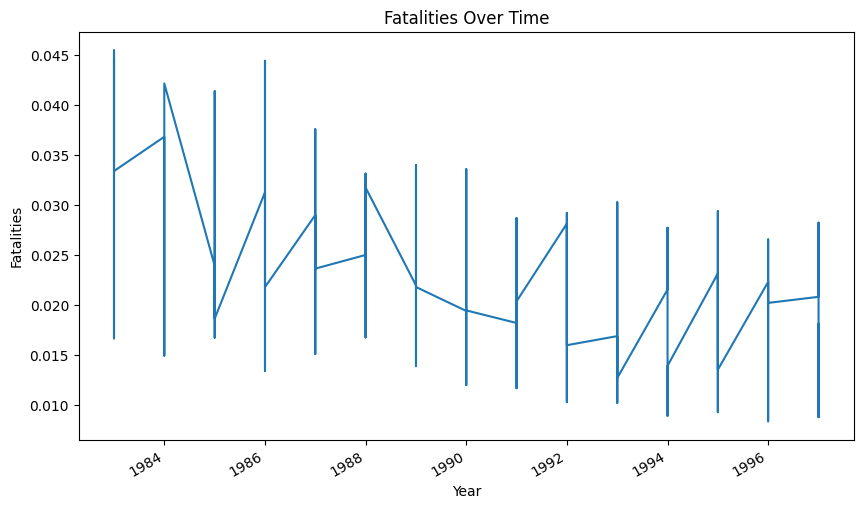

In [34]:

if 'year' in df.columns:
    df['year'] = pd.to_datetime(df['year'], format='%Y')

    df.set_index('year', inplace=True)


    df['fatalities'].plot(figsize=(10, 6))
    plt.title("Fatalities Over Time")
    plt.xlabel("Year")
    plt.ylabel("Fatalities")
    plt.show()


In [35]:
# statistical measures
print(df[['income', 'seatbelt', 'fatalities']].describe())


             income    seatbelt  fatalities
count    765.000000  765.000000  765.000000
mean   17992.586928    0.528852    0.021490
std     4811.459296    0.145052    0.006171
min     8372.000000    0.060000    0.008327
25%    14266.000000    0.481000    0.017341
50%    17624.000000    0.528852    0.021199
75%    21080.000000    0.620000    0.024774
max    35863.000000    0.870000    0.045470


In [36]:
#  contingency table
if 'enforce' in df.columns:
    contingency = pd.crosstab(df['seatbelt'], df['enforce'])
    print(contingency)


enforce   no  primary  secondary
seatbelt                        
0.060      1        0          0
0.070      1        0          0
0.090      1        0          0
0.099      1        0          0
0.110      1        0          0
...       ..      ...        ...
0.850      0        3          0
0.852      0        0          1
0.853      0        1          0
0.860      0        1          0
0.870      0        1          0

[246 rows x 3 columns]


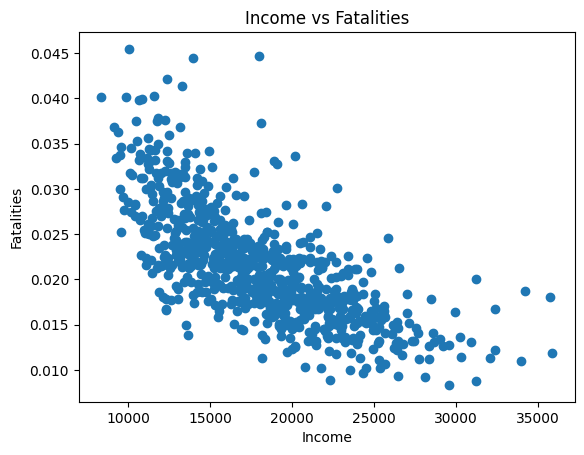

In [38]:
# Scatter plot
plt.scatter(df['income'], df['fatalities'])
plt.title("Income vs Fatalities")
plt.xlabel('Income')
plt.ylabel('Fatalities')
plt.show()


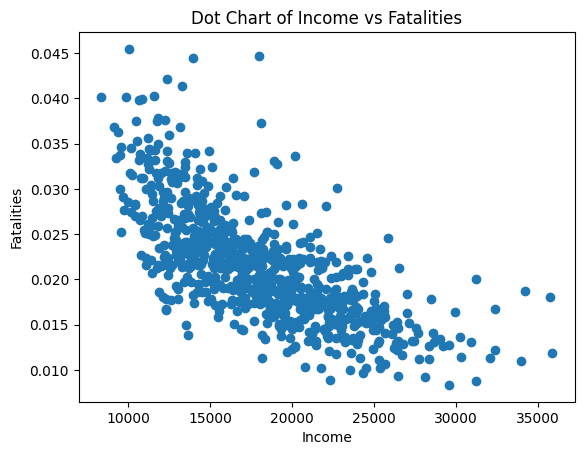

In [39]:
# Dot chart for income vs fatalities
plt.plot(df['income'], df['fatalities'], 'o')
plt.title("Dot Chart of Income vs Fatalities")
plt.xlabel('Income')
plt.ylabel('Fatalities')
plt.show()


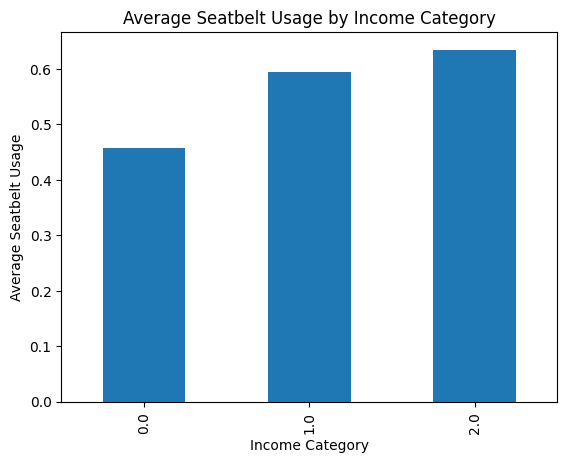

In [40]:
# Bar plot for income categories vs average seatbelt usage
if 'income_binned' in df.columns:
    df.groupby('income_binned')['seatbelt'].mean().plot(kind='bar')
    plt.title("Average Seatbelt Usage by Income Category")
    plt.xlabel("Income Category")
    plt.ylabel("Average Seatbelt Usage")
    plt.show()


In [43]:

from scipy import stats

# Calculate Z-scores
z_scores = np.abs(stats.zscore(df[['fatalities', 'income', 'seatbelt']]))
df_outliers_removed = df[(z_scores < 3).all(axis=1)]
print(z_scores)
print(f"Data after removing outliers: {df_outliers_removed.shape}")


            fatalities    income  seatbelt
year                                      
1983-01-01    3.758546  0.004074  0.000000
1984-01-01    2.569503  0.020883  0.000000
1985-01-01    1.878209  0.193917  0.000000
1986-01-01    0.601578  0.098457  0.000000
1987-01-01    0.324672  0.005909  0.000000
...                ...       ...       ...
1993-01-01    0.610361  0.320780  0.973724
1994-01-01    0.006221  0.389412  1.180682
1995-01-01    0.428797  0.559950  1.249668
1996-01-01    0.334049  0.734439  1.318654
1997-01-01    0.552286  0.957386  1.525612

[765 rows x 3 columns]
Data after removing outliers: (750, 13)


In [58]:
# If there are any categorical variables, we can convert them to dummy variables
df_encoded = pd.get_dummies(df_imputed, drop_first=True)


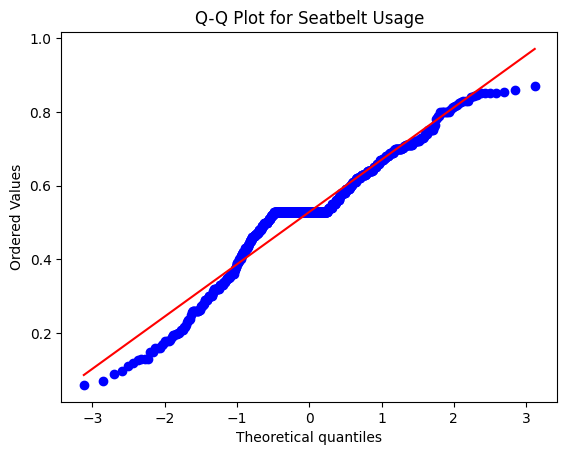

In [46]:
import scipy.stats as stats

# Q-Q plot for 'seatbelt'
stats.probplot(df['seatbelt'], dist="norm", plot=plt)
plt.title("Q-Q Plot for Seatbelt Usage")
plt.show()


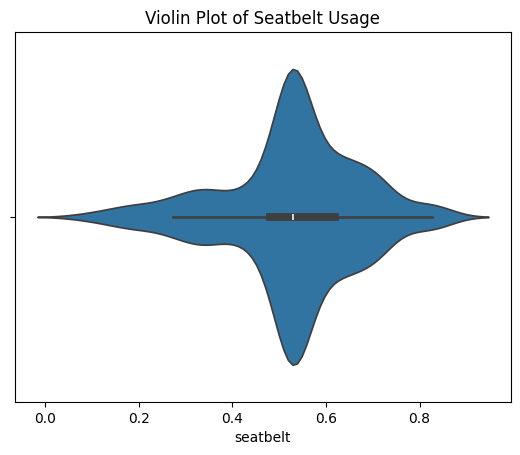

In [47]:
sns.violinplot(x='seatbelt', data=df)
plt.title("Violin Plot of Seatbelt Usage")
plt.show()


In [59]:
# Pearson correlation test between 'income' and 'fatalities'
correlation, p_value = stats.pearsonr(df['income'], df['fatalities'])
print(f"Pearson Correlation: {correlation}, p-value: {p_value}")

# Chi-square test for categorical variables
if 'enforce' in df_encoded.columns:
    contingency_table = pd.crosstab(df_encoded['seatbelt'], df_encoded['enforce'])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    print(f"Chi-square test: chi2={chi2}, p-value={p}")


Pearson Correlation: -0.7035576210085683, p-value: 2.633351921964218e-115


In [60]:
import statsmodels.api as sm

X = df_encoded[['income', 'seatbelt']]
y = df_encoded['fatalities']


X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             fatalities   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     381.4
Date:                Thu, 26 Sep 2024   Prob (F-statistic):          1.67e-115
Time:                        17:59:06   Log-Likelihood:                 3072.5
No. Observations:                 765   AIC:                            -6139.
Df Residuals:                     762   BIC:                            -6125.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0368      0.001     52.935      0.0

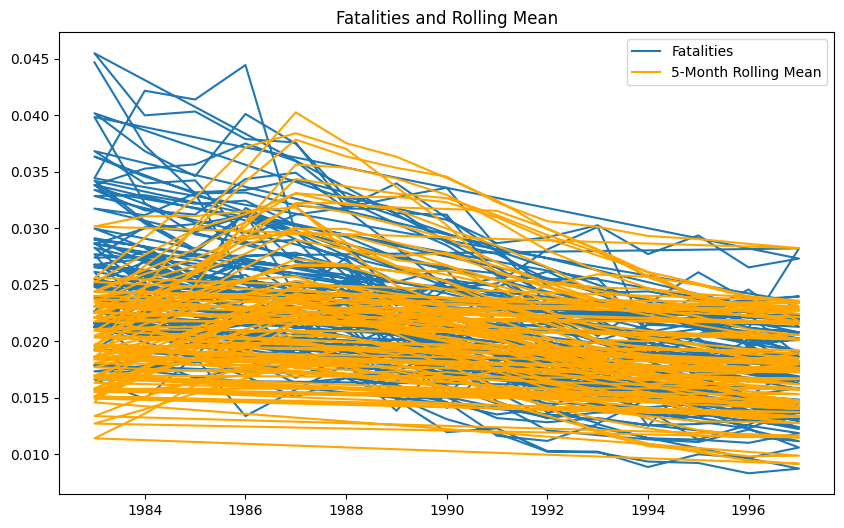

In [51]:
# Calculate moving averages
df['rolling_mean'] = df['fatalities'].rolling(window=5).mean()

plt.figure(figsize=(10, 6))
plt.plot(df['fatalities'], label='Fatalities')
plt.plot(df['rolling_mean'], label='5-Month Rolling Mean', color='orange')
plt.title("Fatalities and Rolling Mean")
plt.legend()
plt.show()


In [64]:
# Calculate skewness and kurtosis
numeric_df = df.select_dtypes(include=[np.number])

if not numeric_df.empty:
    print(f"Skewness:\n{numeric_df.skew()}")
    print(f"Kurtosis:\n{numeric_df.kurt()}")
else:
    print("No numeric columns available for skewness and kurtosis calculations.")


Skewness:
rownames         0.000000
miles            2.611102
fatalities       0.760025
seatbelt        -0.550761
income           0.577792
age             -1.149598
income_binned    0.475392
rolling_mean     0.602880
dtype: float64
Kurtosis:
rownames        -1.200000
miles            9.063223
fatalities       0.811355
seatbelt         0.662616
income           0.210595
age              2.970384
income_binned   -0.710170
rolling_mean     0.376925
dtype: float64


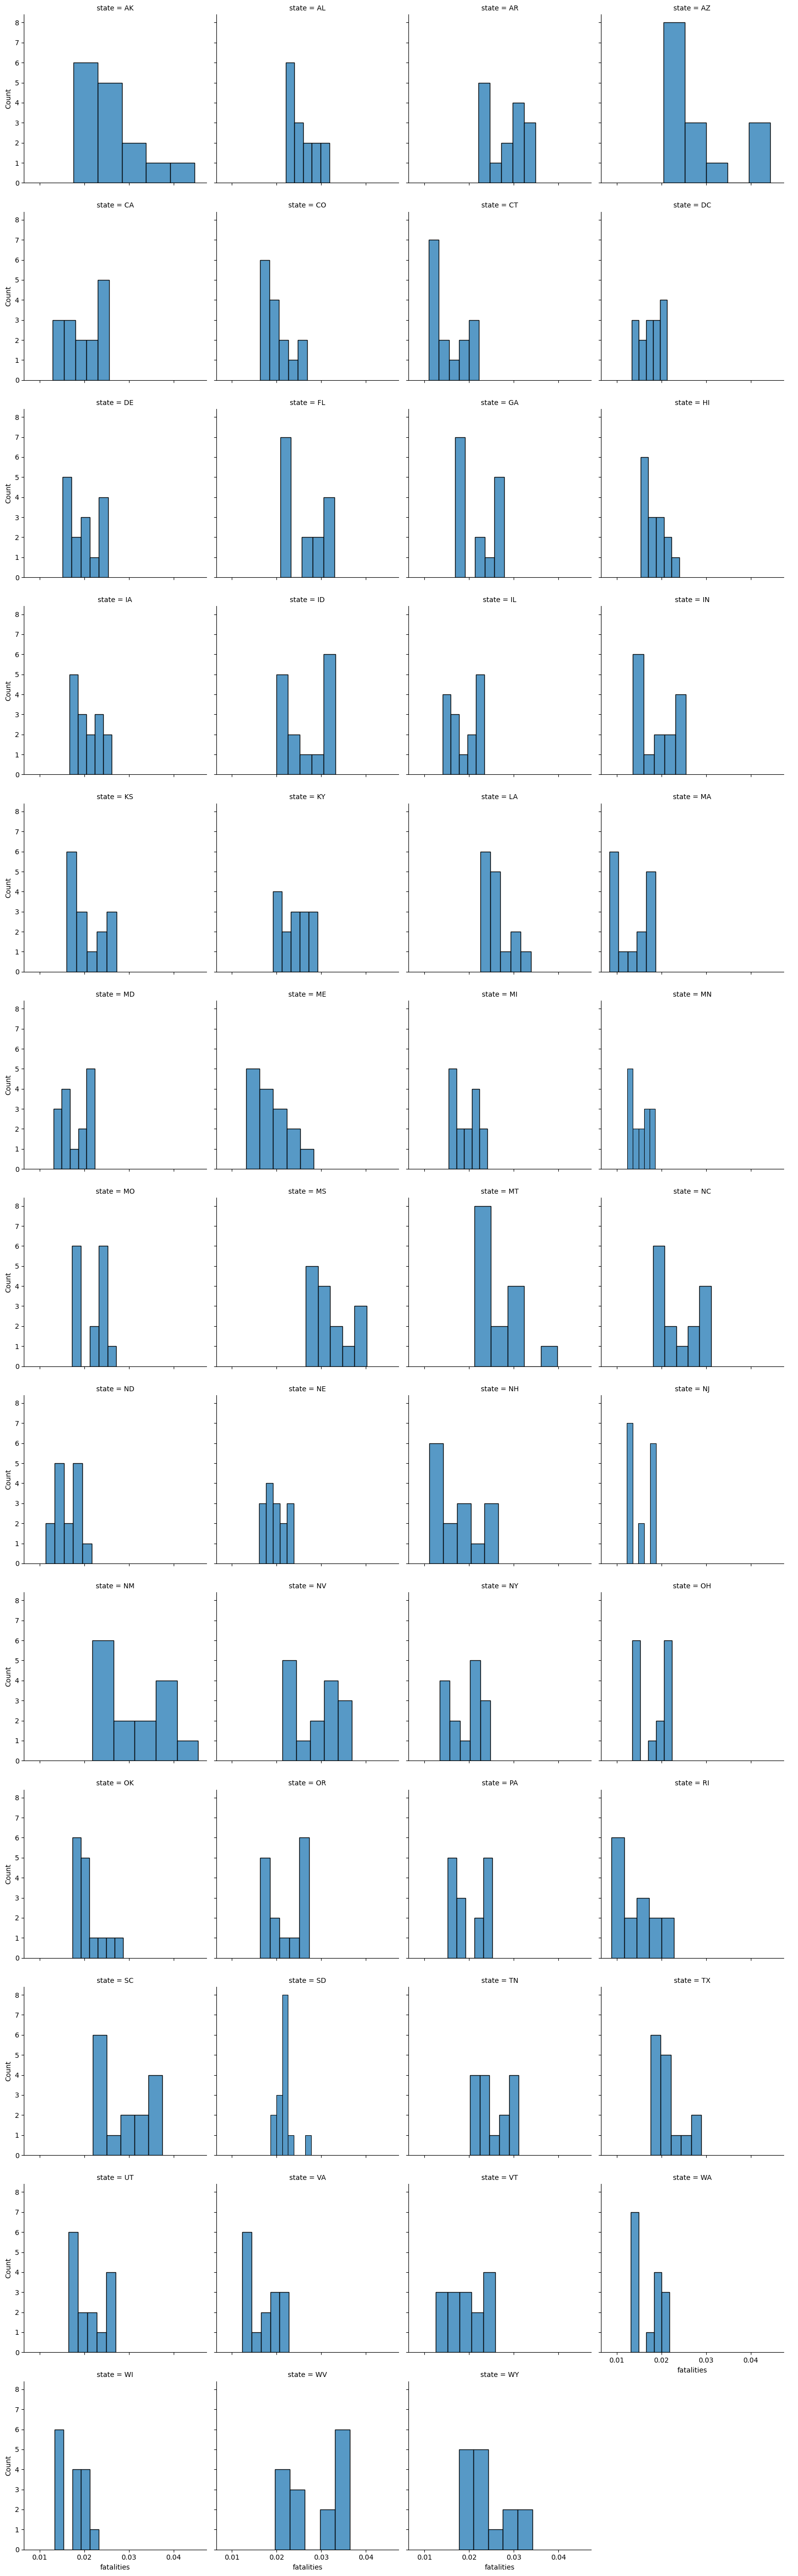

In [65]:
g = sns.FacetGrid(df, col='state', col_wrap=4, height=4)
g.map(sns.histplot, 'fatalities')
g.add_legend()
plt.show()